In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
# 합성곱 신경망을 사용한 이미지 분류 실습

In [2]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


합성곱 신경망

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')) 
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(100, activation='relu')) 
model.add(keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(10, activation='softmax'))

요약본

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

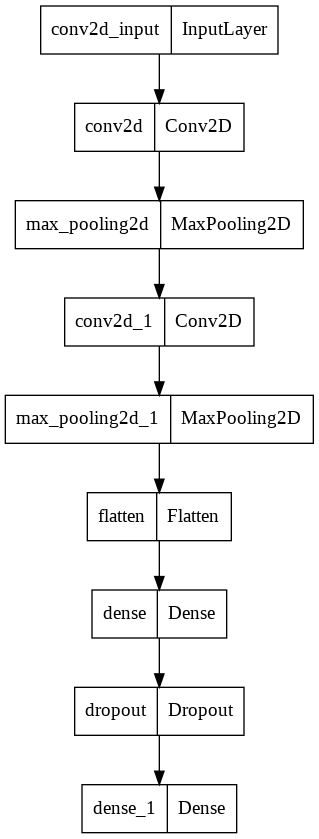

In [9]:
keras.utils.plot_model(model)

컴파일 하고 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 82s 54ms/step - loss: 0.5396 - accuracy: 0.8072 - val_loss: 0.3344 - val_accuracy: 0.8765
Epoch 2/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.3564 - accuracy: 0.8734 - val_loss: 0.2833 - val_accuracy: 0.8931
Epoch 3/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.3040 - accuracy: 0.8908 - val_loss: 0.2573 - val_accuracy: 0.9034
Epoch 4/20
1500/1500 [==============================] - 73s 48ms/step - loss: 0.2721 - accuracy: 0.9010 - val_loss: 0.2356 - val_accuracy: 0.9129
Epoch 5/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2432 - accuracy: 0.9104 - val_loss: 0.2444 - val_accuracy: 0.9106
Epoch 6/20
1500/1500 [==============================] - 73s 48ms/step - loss: 0.2266 - accuracy: 0.9178 - val_loss: 0.2237 - val_accuracy: 0.9203
Epoch 7/20
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2117 - accuracy: 0.9224 - val_loss: 0.2155 -

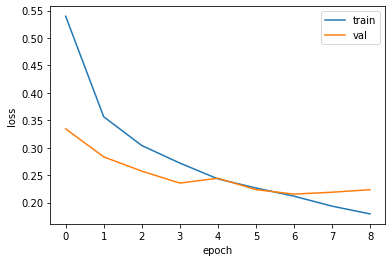

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 15ms/step - loss: 0.2155 - accuracy: 0.9222


[0.2154655158519745, 0.922166645526886]

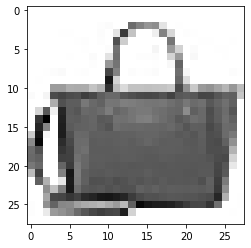

1/1 [==============================] - 0s 149ms/step
[[5.9003156e-14 3.8961608e-25 3.2680049e-18 1.2435216e-18 1.4229784e-16
  1.0186973e-14 8.0025293e-15 1.7399890e-15 1.0000000e+00 2.0542857e-16]]


In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()
preds = model.predict(val_scaled[0:1]) 
print(preds)

In [15]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0 
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 8s 23ms/step - loss: 0.2371 - accuracy: 0.9139


[0.23708684742450714, 0.9139000177383423]